In [1]:
'''

Password - 1000k unique values for password collected online

Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..
Strength of the password based on rules(such as containing digits, special symbols , etc.)


The passwords used in our analysis are from 000webhost leak that is available online

'''

'\n\nPassword - 1000k unique values for password collected online\n\nStrength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..\nStrength of the password based on rules(such as containing digits, special symbols , etc.)\n\n\nThe passwords used in our analysis are from 000webhost leak that is available online\n\n'

# 1.. read data from SQL Database !

In [2]:
## importing all necessary libraries ..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sqlite3

In [4]:
## u have your data into 'password_Data.sqlite' which has table has 'Users' 
## now u can read data from this db file 'password_Data.sqlite' using sqlite3 & pandas

In [5]:
# very first u have to create a SQL connection to our SQLite database
con = sqlite3.connect("password_Data.sqlite")

In [6]:
#### check online its table name on https://sqliteonline.com/
data = pd.read_sql_query("SELECT * FROM Users" , con)

In [7]:
data.shape

(100000, 3)

In [8]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


# 2.. Doing basic data cleaning !

In [9]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

### Removing ir-relevant features !

In [10]:
data.drop(["index"] , axis=1 , inplace=True)

In [11]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


### Check duplicate rows

In [12]:
data.duplicated().sum()

0

### check missing values in columns 

In [13]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [14]:
data.isnull().any().sum() ## it means 0 feature have NAN values

0

### check data-types of every feature !

In [15]:
data.dtypes

password    object
strength     int64
dtype: object

### checking whether "strength" feature has ir-relevant values or not !

In [16]:
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [17]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

# 3.. Performing Semantic Analysis !
    e.g ,,      
          
          a) How many password textual actually holds only numeric characters ?
          b) How many password textual actually holds only Upper-case character ? 
          
          c) How many password textual actually holds only alphabet ?
          d) How many password textual actually holds alpha-numeric character ? 
          e) How many password textual actually holds title-case character ? 
          
          f) How many password textual actually holds some special special character ? 
          
          

In [18]:
data.columns

Index(['password', 'strength'], dtype='object')

In [19]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [20]:
data["password"][0]

'zxe870819'

In [21]:
type(data["password"][0])

str

### a) How many password textual actually holds only numeric characters ?

In [22]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [23]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [24]:
data[data["password"].str.isnumeric()].shape  ### only 26 people have set their password as only number !

(26, 2)

### b) How many password textual actually holds only Upper-case character ? 

In [25]:
data[data["password"].str.isupper()]

### around 1500 users have their password as only capital letters !

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


### c) How many password textual actually holds only alphabet ? 

In [26]:
data[data["password"].str.isalpha()].shape

### around 50 users have their password as alphabet letters only !

(50, 2)

### d) How many password textual actually holds alpha-numeric character ? 

In [27]:
data[data["password"].str.isalnum()]

### most of the users around 97K have their password as alpha-numeric..

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


### e) How many password textual actually holds title-case character ? 

In [28]:
data[data["password"].str.istitle()]

### around 932 users have their password having first alphabet capital !

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


### f) How many password textual actually holds special character ? 

In [29]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [30]:
import string

In [31]:
string.punctuation ## all punctuations defined in "string" package !

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [33]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [34]:
data[data["password"].apply(find_semantics)==1]

## ie , 2663 observations have special characters in between them ..
## 2.6% people password actually uses special character in their password ..

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


## 4.. Applying Feature Engineering !

In [35]:
'''

we have password strength so you can do a quick google search to check what features password depends on:-
It depends on 5 factors :

    Length of password
    Frequency of Lowercase Characters
    Frequency of Uppercase Characters
    Frequency of Numeric Characters
    Frequency of Special Characters

These will be the result of the google search to find factors effecting strength of password..


'''

'\n\nwe have password strength so you can do a quick google search to check what features password depends on:-\nIt depends on 5 factors :\n\n    Length of password\n    Frequency of Lowercase Characters\n    Frequency of Uppercase Characters\n    Frequency of Numeric Characters\n    Frequency of Special Characters\n\nThese will be the result of the google search to find factors effecting strength of password..\n\n\n'

#### length of every Password 

In [36]:
data["password"][0]

'zxe870819'

In [37]:
len(data["password"][0]) 

9

In [38]:
data["length"] = data["password"].str.len() 

#### Frequency of Lowercase Characters :

In [39]:
password = "Shan99"

In [40]:
[char for char in password if char.islower()]

['h', 'a', 'n']

In [41]:
len([char for char in password if char.islower()])

3

In [42]:
len([char for char in password if char.islower()])/len(password)

0.5

In [43]:
'''

Q..->> why we are diving each value by its Total length or why we are normalizing frequency ? 

Ans : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could 
also be high , so lets normalise it in the range between 0 to 1


'''

'\n\nQ..->> why we are diving each value by its Total length or why we are normalizing frequency ? \n\nAns : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could \nalso be high , so lets normalise it in the range between 0 to 1\n\n\n'

In [44]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

#### Frequency of Uppercase Characters :

In [45]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

#### Frequency of Numeric Characters :

In [46]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [47]:
### applying user-defined functions ..

In [48]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [49]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


#### Frequency of Special-case Characters :

In [50]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [51]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [52]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [53]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## noromalising "special_char_freq" feature 

In [54]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


## 5.. Performing Descriptive Statistics !

In [55]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [56]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [57]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [58]:
'''

Just taking a rough look at the above stats I can say the following:-



->> Higher the length, Higher the strength

->> In case on alphabet frequency higher is not better. 
    Probably because it'll not be a strong password if max portion is occupied by just alphabets..
    Password has more strength if the char types are spread in decent proportions.



'''

"\n\nJust taking a rough look at the above stats I can say the following:-\n\n\n\n->> Higher the length, Higher the strength\n\n->> In case on alphabet frequency higher is not better. \n    Probably because it'll not be a strong password if max portion is occupied by just alphabets..\n    Password has more strength if the char types are spread in decent proportions.\n\n\n\n"

In [59]:
#### Similarly , if u need viz representation of above output : (u can refer boxplot)
## bcz boxplot basically gives us 5-point summary of data !

In [60]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

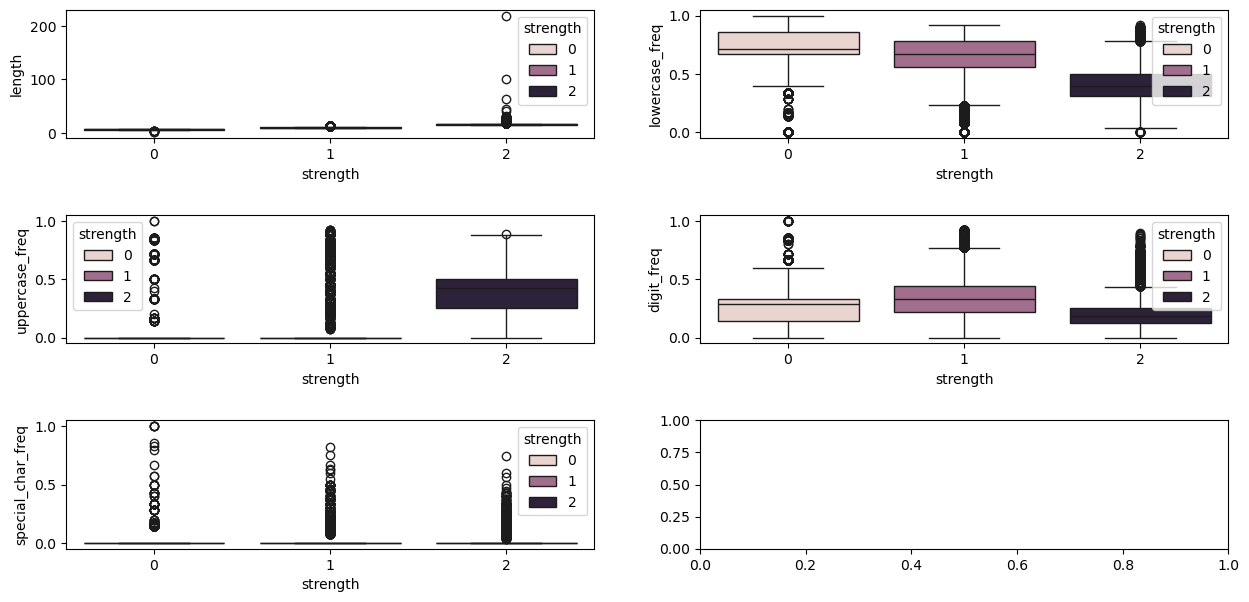

In [61]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [62]:
'''
Insights :
Regarding the insights we can say that:-



->> Higher Lowercase frequency is seen in low strength passwords. 
    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.


->> In digit_freq there is a split of majority poplutation of strength 1 and 2 
    but for 0 and 1 strength , there is overlap so no too much to say there. 
    But we can say a nicely propotioned password is good..
    
    
->> In upper_freq , there is a trend but not as strong as length or lower_freq..
    
    
->> Similar but stronger same trend as above in special_freq.

->> Higher strength passwords have more type breaks.


'''

'\nInsights :\nRegarding the insights we can say that:-\n\n\n\n->> Higher Lowercase frequency is seen in low strength passwords. \n    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.\n\n\n->> In digit_freq there is a split of majority poplutation of strength 1 and 2 \n    but for 0 and 1 strength , there is overlap so no too much to say there. \n    But we can say a nicely propotioned password is good..\n    \n    \n->> In upper_freq , there is a trend but not as strong as length or lower_freq..\n    \n    \n->> Similar but stronger same trend as above in special_freq.\n\n->> Higher strength passwords have more type breaks.\n\n\n'

## 6.. Feature Importance ! ( How to figure out imp. feature )

In [63]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [64]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [65]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

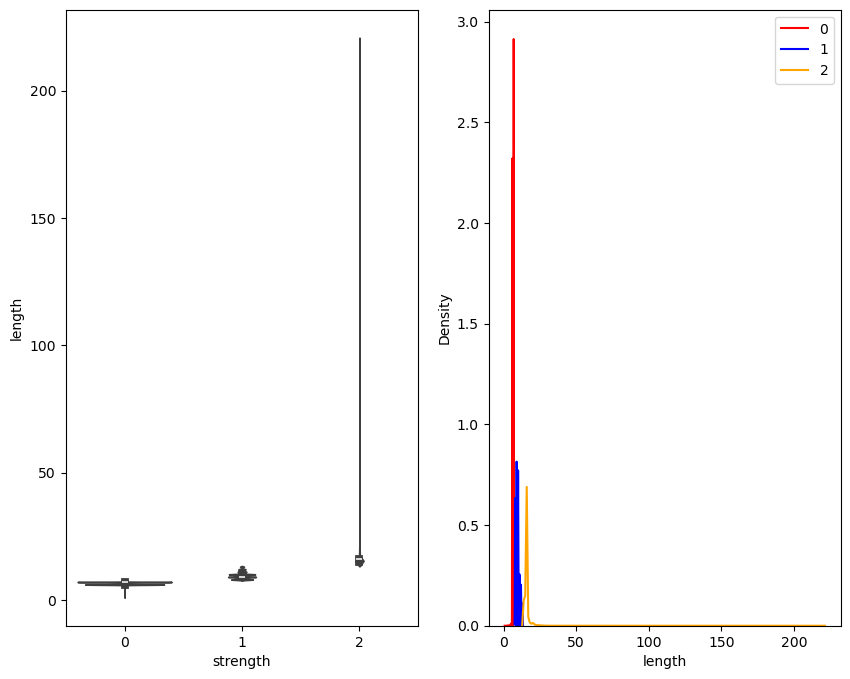

In [66]:
get_dist(data , "length")

In [67]:
### we have few overlappping region in distribution plot 
### when class is 2 , we have higher value of 'length' than class 1 & class 0

## it means 'length' is a interesting feature as we have very less overlapping region

## similarly from violinplot ,we will say on account of less overlappping , 
## this feature 'length' is amazing & useful in determining the strength


In [68]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

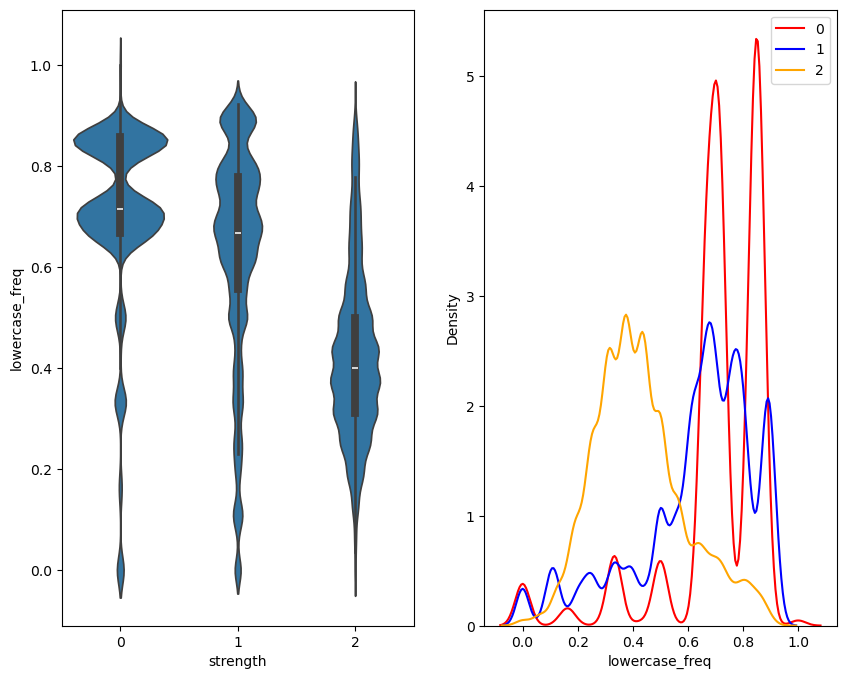

In [69]:
get_dist(data , 'lowercase_freq')

In [70]:
### we have some kind of overlappping region in distribution plot 
### when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

## it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

## similarly from violinplot ,we will say on account of such overlappping , 
## when class is 2 we have less value of 'lower_freq' than class 1 & class 0
## this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

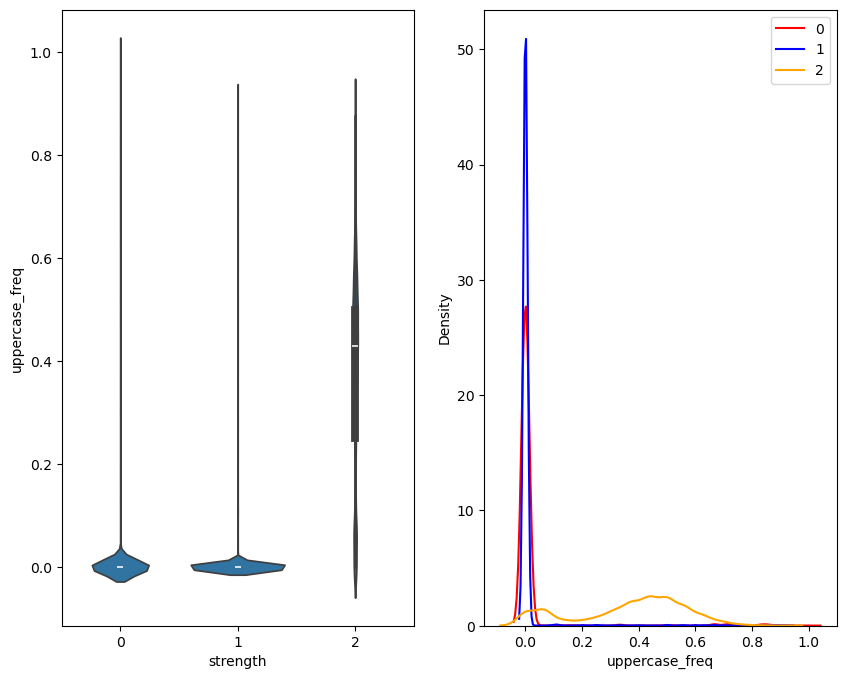

In [71]:
get_dist(data , 'uppercase_freq')

In [72]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

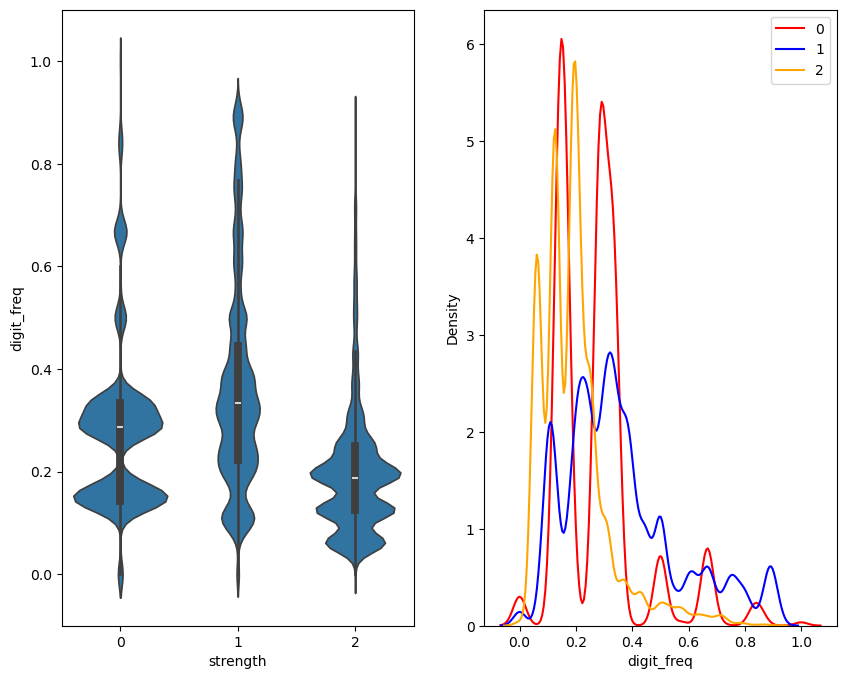

In [73]:
get_dist(data , 'digit_freq')

In [74]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

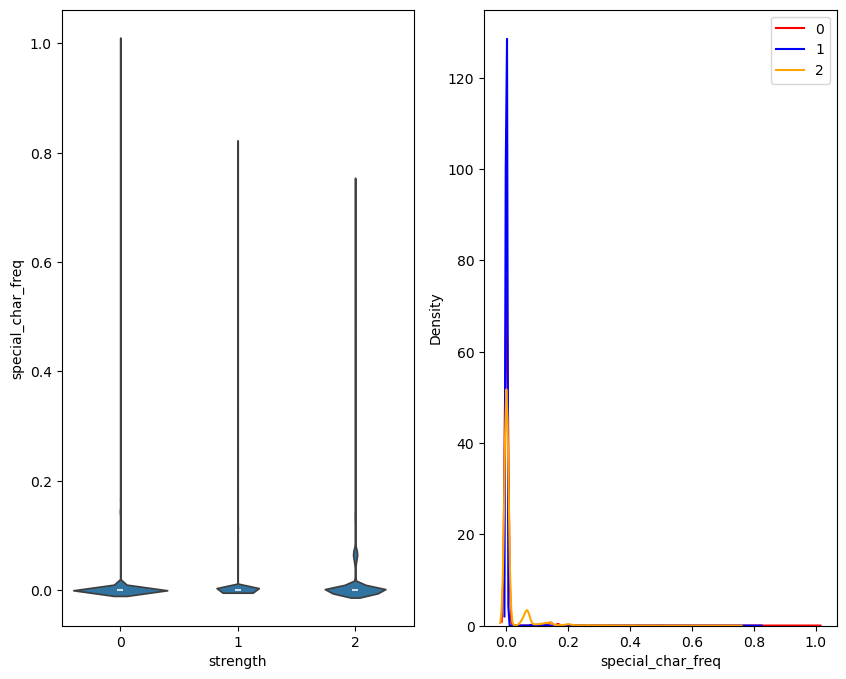

In [75]:
get_dist(data , 'special_char_freq')

In [76]:
'''

Key Insight : It ives us idea that length & lowercase freq are important features..


'''


'\n\nKey Insight : It ives us idea that length & lowercase freq are important features..\n\n\n'

## 7.. Applying TF_IDF on data

In [77]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [78]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [79]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel 

In [80]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
9307,qerpatzcs12,1,11,0.818,0.000,0.182,0.000000
30948,julio7,0,6,0.833,0.000,0.167,0.000000
60701,mdelcielo.88@gmail.com,2,22,0.773,0.000,0.091,0.136364
88107,Q3391569,1,8,0.000,0.125,0.875,0.000000
20130,pmHfFajM5NAmRRE7,2,16,0.375,0.500,0.125,0.000000
...,...,...,...,...,...,...,...
89087,geseteq953,1,10,0.700,0.000,0.300,0.000000
98860,baikhora1,1,9,0.889,0.000,0.111,0.000000
97635,ylikug347,1,9,0.667,0.000,0.333,0.000000
93109,lollerdelol1,1,12,0.917,0.000,0.083,0.000000


In [81]:
x = list(dataframe["password"])

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

In [83]:
#### as password is a series of chars , we have to calculate TF_IDF values of each char 
#### Thats why we have to split our password as-->>
#### kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']


### then we can compute Tf-Idf value of each character like Tf-IDF value of k , Tf-IDF value of z


In [84]:
vectorizer = TfidfVectorizer(analyzer="char")

In [85]:
X = vectorizer.fit_transform(x)

In [86]:
X.shape


## ie (100000,1) passwords gets represented using (100000, 99)
## ie each password gets represented using 99 dimensions ..

## note : in your case , this dimension might be changed !

(100000, 99)

In [87]:
dataframe["password"].shape

(100000,)

In [88]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [89]:
X.toarray()  ### to get entire matrix of TF-IDF for 100000 passwords ..

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
X.toarray()[0] ## TF-IDF scores of Ist row

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2190583 , 0.25343984, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21096101, 0.        , 0.33043186,
       0.        , 0.24713155, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.34829483, 0.39958768, 0.28101415,
       0.28741724, 0.29915902, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.37545253, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [91]:
dataframe["password"]

9307                qerpatzcs12
30948                    julio7
60701    mdelcielo.88@gmail.com
88107                  Q3391569
20130          pmHfFajM5NAmRRE7
                  ...          
89087                geseteq953
98860                 baikhora1
97635                 ylikug347
93109              lollerdelol1
58922                  zz36q9n5
Name: password, Length: 100000, dtype: object

In [92]:
len(vectorizer.get_feature_names_out())

99

In [93]:
### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

## ie these are the various chars to which different TF-IDF values are assigned for 100000 passwords ..

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [94]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [95]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8.. Applying Machine Learning algorithm !

In [96]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [97]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [98]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [99]:
y = dataframe["strength"]

#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [102]:
X_train.shape

(80000, 101)

In [103]:
y_train.shape

(80000,)

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")

In [106]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [107]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data

In [108]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [109]:
from collections import Counter

In [110]:
Counter(y_pred)

Counter({1: 16780, 2: 1741, 0: 1479})

## 9.. Doing prediction on sample data (user-entered input)

In [111]:
### as Logistic reg. model'clf' was trained on 101 features [99 from TF-IDF + 2 features from (total_length+lower_case_freq)]
## hence we need to convert any input(password) into (1,101) so that my model will accept this as Input ..

In [112]:
password = "%@123abcd"

In [113]:
sample_array = np.array([password])

In [114]:
sample_matrix = vectorizer.transform(sample_array)

In [115]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [116]:
sample_matrix.toarray().shape

### right now , array dim. is (1,99) so now we need to make it as : (1,101) so that my model will accept it as input..
### ie we need to add (length_of_password) & (total_lowercase_chars) in passsword

(1, 99)

In [117]:
password

'%@123abcd'

In [118]:
len(password)

9

In [119]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [120]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [121]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [122]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [123]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [124]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [125]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [126]:
### lets Automate it (lets design a function)

In [143]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [144]:
predict()

Enter a password : hnasfjafahy


'Password is normal'

## 10.. Model evaluation :

In [ ]:
#### check Accuracy of your model using confusion_matrix, accuracy_score

In [145]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [146]:
accuracy_score(y_test , y_pred)

0.79865

In [147]:
confusion_matrix(y_test , y_pred)

array([[  794,  1958,     0],
       [  654, 13865,   261],
       [   76,  1078,  1314]], dtype=int64)

In [ ]:
### create report of your model

In [149]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.52      0.29      0.37      2752
           1       0.82      0.94      0.88     14780
           2       0.83      0.53      0.65      2468

    accuracy                           0.80     20000
   macro avg       0.73      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000

